# Deep Dive into Machine Learning Model Performance: Logistic Regression vs. XGBoost


In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Task 1 
## For every column in the data:
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

## Data Cleaning 

### Checking first 15 rows 

In [315]:

df_fitness = pd.read_csv('fitness_class_2212.csv')
df_fitness.head(15)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [316]:
df_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [317]:
# Clean the `days_before` column.

# change the column to a string and remove non-numerical characters. 
df_fitness['days_before'] = df_fitness['days_before'].astype('string')
df_fitness['days_before'] = df_fitness['days_before'].str.replace(' days','')

# change days_before to int type. 
df_fitness['days_before'] = df_fitness['days_before'].astype(int)
# determine if there are any observations with a value = 0 for 'days_before'
df_fitness[df_fitness['days_before']==0].shape

(0, 8)

In [318]:
df_fitness.describe()

,booking_id,months_as_member,weight,days_before,attended
count,1500.000000,1500.000000,1480.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,0.302667
std,433.157015,12.926543,12.765859,4.077938,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000
25%,375.750000,8.000000,73.490000,4.000000,0.000000
50%,750.500000,12.000000,80.760000,9.000000,0.000000
75%,1125.250000,19.000000,89.520000,12.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,1.000000



###

In [319]:
df_fitness.isnull().sum().sort_values()

booking_id           0
months_as_member     0
days_before          0
day_of_week          0
time                 0
category             0
attended             0
weight              20
dtype: int64

In [320]:
df_fitness['attended'].sum()

454

### booking_id
- Checking that they are indeed unique. 

In [321]:
print( 'the number of unique values',df_fitness['booking_id'].nunique())

the number of unique values 1500


### Months as member

In [322]:
print('the smallest value in the months_as_members column is ',df_fitness['months_as_member'].min())

the smallest value in the months_as_members column is  1


### Wieght

In [323]:
df_fitness['weight'] = df_fitness['weight'].fillna(df_fitness['weight'].mean())
df_fitness['weight'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
1500 non-null   float64
dtypes: float64(1)
memory usage: 11.8 KB


### [day_of_week]()

In [324]:
print(df_fitness['day_of_week'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']


There are some inconsistent data here so I will need to clean that up. 

In [325]:
df_fitness['day_of_week'] = df_fitness['day_of_week'].str.replace('nesday','')
df_fitness['day_of_week'] = df_fitness['day_of_week'].str.replace('day','')
df_fitness['day_of_week'] = df_fitness['day_of_week'].str.replace('.','')

print(df_fitness['day_of_week'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


### time

In [326]:
df_fitness['time'].unique()

array(['PM', 'AM'], dtype=object)

### category

In [327]:
df_fitness['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [328]:
#replace '-' with unkown
df_fitness['category'] = df_fitness['category'].str.replace("-",'Unknown')
df_fitness['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'Unknown', 'Aqua'],
      dtype=object)

# Task 2
## Create a visualization that shows how many bookings attended the class. Use the
visualization to:
- State which category of the variable attended has the most observations
- Explain whether the observations are balanced across categories of the variable attended
****

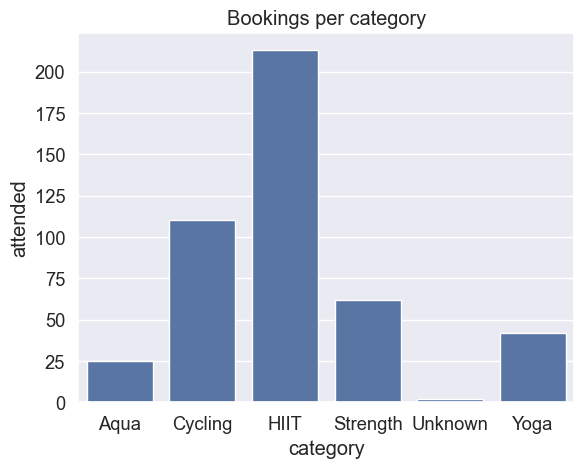

,attended
category,
Aqua,25
Cycling,110
HIIT,213
Strength,62
Unknown,2
Yoga,42


In [329]:
sns.barplot(data=df_fitness.groupby('category')['attended'].sum().reset_index(),x='category',y='attended',ci=False,)
plt.title("Bookings per category")
plt.show()
pd.pivot_table(data=df_fitness,index='category',values='attended',aggfunc='sum')

# Insights on Exercise Categories

1. **Dominance of HIIT**: The HIIT exercise category stands out as the most popular or most frequently recorded category, with a total of 213 observations. This number is notably significant, being 103 observations more than the category that follows. This dominance suggests that:
    - HIIT exercises might be the most preferred or most offered type of exercise.
    - There may be specific promotions or marketing strategies highlighting HIIT, leading to its high count.
    - It indicates a trend or preference among the members or users towards HIIT workouts.

2. **Imbalance in Distribution**: A clear imbalance exists in the distribution of observations among the exercise categories. This means:
    - Some categories are underrepresented, which might require attention if the aim is to offer a balanced range of exercise types.
    - The dataset might not provide a full picture of the less frequent categories, potentially leading to biases in any analyses or decisions based on this data.
    - The organization might need to consider strategies to promote underrepresented exercise categories if the aim is diversity in offerings.

---

**Recommendations:**
- Conduct further investigations into the reasons behind the popularity of HIIT. Is it member preference, marketing strategies, or some other factor?
- Evaluate if promoting other exercise categories might diversify the offerings and cater to a broader member base.
- Consider stratified sampling or other techniques in future data collection efforts to ensure balanced representation if required.


# Task 3
- Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.


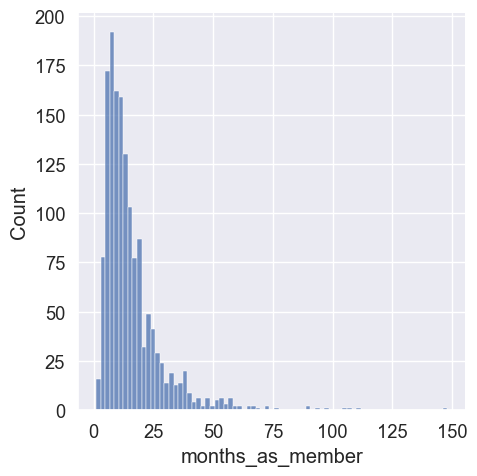

In [330]:
sns.displot(data=df_fitness, x='months_as_member',kind='hist')

We can conclude the the majority of members have been there for less than 40 days but to get a more accurate measurement we can use a ECDF chart. 

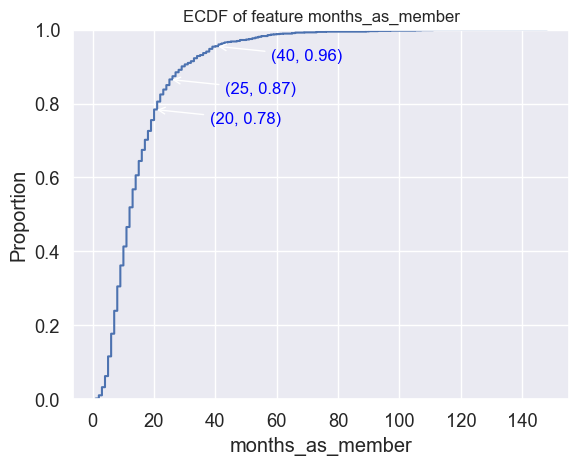

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the ECDF

sns.ecdfplot(data=df_fitness, x='months_as_member')
sns.set_context('notebook')


# List of x-values to annotate
x_values = [20,25,40]

for x in x_values:
    # Calculate the y-value using the ECDF
    y = df_fitness['months_as_member'].le(x).mean()
    
    # Annotate the plot
    plt.annotate(f'({x}, {y:.2f})', (x, y), textcoords="offset points", xytext=(40,-10),                                ha='left',arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='blue')
    
plt.title("ECDF of feature months_as_member")

plt.show()


# Insights on `months_as_member` from the ECDF

1. **Short-Term Members Dominate:** The ECDF reveals that the majority of members have recently joined. Specifically, 78% of all members have been a part of the community for 20 days or less. This indicates a large influx of new members or perhaps a pattern of short-term memberships.

2. **Mid-Term Members:** The next segment, representing those who've been members for up to 25 days, encapsulates 87% of the total member population. This suggests that there's a smaller but still significant group that stays beyond the 20-day mark.

3. **Long-Term Members are Rare:** Notably, a vast 96% of members have a membership duration of 40 days or less. This means that only 4% of members have been around for longer than 40 days. This could point towards a trend where members tend to move on after the 40-day period or perhaps a programmatic offering that spans 40 days.


# Task 4
4. Describe the relationship between attendance and number of months as a member.
Your answer must include a visualization to demonstrate the relationship.

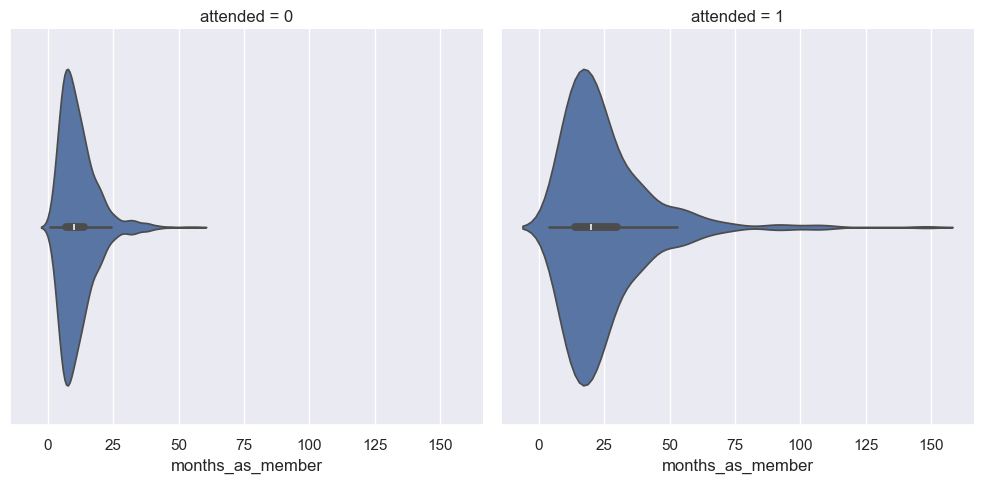

In [332]:
sns.catplot(data=df_fitness,x='months_as_member', col_wrap=2,col='attended', kind='violin')

In [333]:
print(df_fitness[['months_as_member','attended']].corr())

                  months_as_member  attended
months_as_member          1.000000  0.485526
attended                  0.485526  1.000000


# Insights on the Relationship between Attendance and Months as a Member

1. **Long-standing Members Attend More**: The data reflects a trend where longer-standing members are more likely to attend. This could indicate several things:
    - Loyalty Factor: Members who have been part of the program for a longer time may have developed a stronger bond or loyalty to the classes, making them more likely to attend.
    - Habit Formation: As members continue their journey, they might have formed a routine or habit of attending classes, leading to more consistent attendance.
    - Value Proposition: Long-standing members might be experiencing significant value from the classes, leading to higher attendance rates.

2. **Moderate Linear Relationship**: A correlation coefficient of 0.48 between `months_as_member` and attendance signifies a moderate positive linear relationship. This means:
    - As the duration of membership increases, there's a higher likelihood that the member will attend classes.
    - The relationship, though moderate, can be utilized in predictive modeling or targeted marketing campaigns to boost attendance.
    - It's essential to consider other potential confounding variables or factors that could also influence attendance. 

---

**Implications and Recommendations:**
- **Retention Efforts**: Given that longer-standing members attend more frequently, efforts should be made to retain new members, perhaps through engagement strategies during their initial months.
- **Targeted Marketing**: Use the identified relationship for targeted marketing campaigns. For example, engage members reaching a particular threshold (like 6 months) with special offers or classes, as they might be on the cusp of becoming more regular attendees.
- **Further Analysis**: Dive deeper into other factors affecting attendance. Are there specific classes or instructors that long-standing members prefer? Does the time of day, week, or year influence attendance patterns?


# Data preprocessing for fit and comparison

## Using one-hot-encoding for categorical variables using pd.get_dummies()

In [334]:
category_dummies=pd.get_dummies(data=df_fitness['category'])
time_dummies = pd.get_dummies(data=df_fitness['time'])
dow_dummies = pd.get_dummies(data=df_fitness['day_of_week'])

## Concatenating the resulting dummie dataframes with df_fitness

In [335]:
df_fitness = pd.concat([df_fitness,category_dummies,time_dummies,dow_dummies],axis=1)
df_fitness

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,Aqua,Cycling,HIIT,Strength,Unknown,Yoga,AM,PM,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,1,17,79.56,8,Wed,PM,Strength,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,2,10,79.01,2,Mon,AM,HIIT,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2,3,16,74.53,14,Sun,AM,Strength,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,4,5,86.12,10,Fri,AM,Cycling,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4,5,15,69.29,8,Thu,AM,HIIT,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1496,1497,29,89.55,2,Mon,AM,Strength,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## Dropping the categorical features that were One-hot-encoded

In [336]:
model_data = df_fitness.drop(columns=['booking_id','day_of_week','time','category'])
model_data_columns = model_data.columns
model_data

,months_as_member,weight,days_before,attended,Aqua,Cycling,HIIT,Strength,Unknown,Yoga,AM,PM,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,17,79.56,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,10,79.01,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2,16,74.53,14,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,5,86.12,10,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4,15,69.29,8,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,21,79.51,10,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1496,29,89.55,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1497,9,87.38,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1498,34,68.64,14,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## Normalizing dataset for better performance in model prediction.

In [337]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(model_data)
normalized_data = pd.DataFrame(normalized_data,columns=model_data_columns)
normalized_data

,months_as_member,weight,days_before,attended,Aqua,Cycling,HIIT,Strength,Unknown,Yoga,AM,PM,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0.108844,0.209799,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.061224,0.205021,0.035714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.102041,0.166102,0.464286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.027211,0.266788,0.321429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.095238,0.120580,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.136054,0.209365,0.321429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.190476,0.296586,0.035714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1497,0.054422,0.277734,0.107143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1498,0.224490,0.114934,0.464286,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Seperating dataset into test and train datasets. 

In [338]:
from sklearn.model_selection import train_test_split
X = normalized_data.drop('attended', axis=1)
y = normalized_data[['attended']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y)


## Using LassoCV to eliminate unhelpful features from the X_test dataset

In [339]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5)
model.fit(X_train,y_train)
selected_features = X_train.columns[model.coef_ != 0]
selected_features



Index(['months_as_member', 'weight', 'HIIT', 'Strength', 'Yoga', 'AM', 'PM',
       'Mon', 'Sun', 'Thu', 'Wed'],
      dtype='object')

## Selecting only helpful features identified from the previous LassoCV regression. 

In [340]:
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]


# Task 5 
The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).


# Problem type:
This type of prediction is **classification**

# Task 6
Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.

In [341]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_selected, y_train)
y_pred_logClf =model.predict(X_test_selected)
y_probabilities_logClf = model.predict_proba(X_test_selected)

In [342]:
probabilities = model.predict_proba(X_test_selected)[:, 1]


In [343]:
def predict_with_threshold(probabilities, threshold):
    return [1 if prob > threshold else 0 for prob in probabilities]

threshold = 0.329  # Example threshold
custom_predictions = predict_with_threshold(probabilities, threshold)


# Task 7
7. Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.

In [344]:
import xgboost

xgb_clf = xgboost.XGBClassifier(n_estimators=90, learning_rate=.99, gamma=5.99, subsample=0.8,
                              colsample_bytree=0.1, max_depth=1, random_state=42)
xgb_clf.fit(X_train_selected, y_train)
y_pred_xgb_clf =xgb_clf.predict(X_test_selected)
y_probabilities_xgb = xgb_clf.predict_proba(X_test_selected)


# Task 8
8. Explain why you chose the two models used in parts 6 and 7

# Model Choices: 

## 1. **Logistic Regression**

**Why was it chosen?**
Logistic Regression is one of the simplest yet powerful algorithms, especially for binary classification problems. Here are the main reasons I opted for it:

- **Interpretability:** One of the significant strengths of Logistic Regression is that it's highly interpretable. Each feature has a corresponding coefficient which can give insights into the impact of that feature on the prediction.

- **Speed:** Logistic Regression models can be trained rapidly, allowing us to quickly establish a baseline model. This ensures we have a foundational understanding of the problem and can set performance benchmarks early on.

- **Probabilistic Outputs:** Instead of merely returning a binary label, Logistic Regression provides a probability score for observations. This nuanced understanding can be valuable for certain applications and helps in understanding factors influencing the predictions.

## 2. **XGBoost**

**Why was it chosen?**
XGBoost has been a favorite in machine learning competitions due to its efficiency and performance. For my problem, these were the compelling reasons:

- **Regularization and Pruning:** XGBoost is known for its capacity to regularize data, reducing the chances of overfitting. It also employs techniques like pruning to enhance model accuracy.

- **Built-in Cross-Validation:** This ensures that the model's performance is validated during the training process itself, providing insights into how well it might perform on unseen data.

- **Parallel Processing:** One of XGBoost's strengths is its ability to utilize multiple CPU cores during the training process. This makes it faster and more efficient, especially when dealing with larger datasets.

---

With these choices, I aimed to strike a balance between simplicity (with Logistic Regression) and performance (with XGBoost). This dual approach ensures that I not only get rapid insights but also have the capability to delve deeper for more accuracy if required. 


# Task 9
Compare the performance of the two models used in parts 6 and 7, using any method
suitable. You must include your code.

## Logistic regression performance
---

### Accuracy Score

In [345]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_logClf)
print(accuracy)

0.77


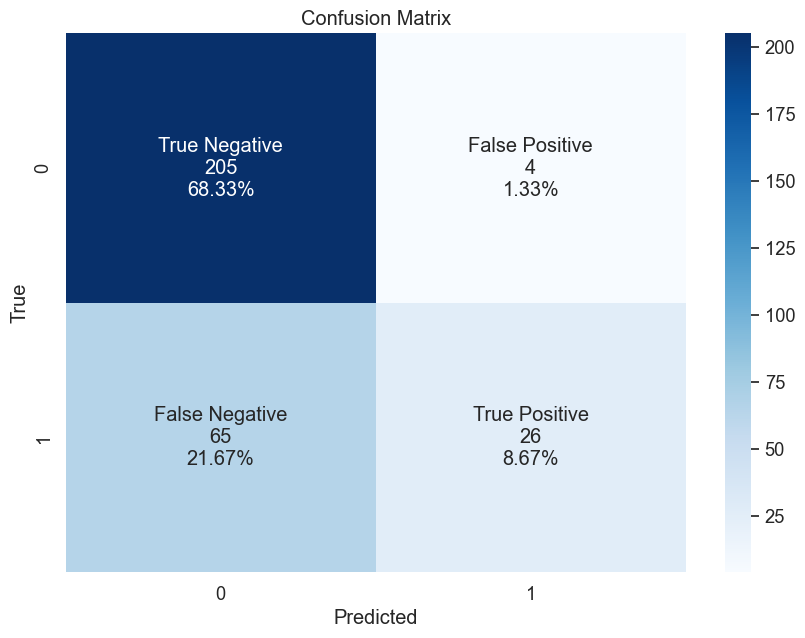

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined
cm = confusion_matrix(y_test, y_pred_logClf)

# Define the labels of the matrix for clarity
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.2)  # Adjust to fit
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


### SKlearn Classification Report: 

In [347]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_logClf)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86       209
         1.0       0.87      0.29      0.43        91

    accuracy                           0.77       300
   macro avg       0.81      0.63      0.64       300
weighted avg       0.79      0.77      0.73       300



In [348]:
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_probabilities_logClf, )
print(loss)

0.4923360506949941


## XGBoost performance: 
----


### Accuracy Score: 

In [349]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_xgb_clf)
print(accuracy)


0.8066666666666666


## Confusion matrix

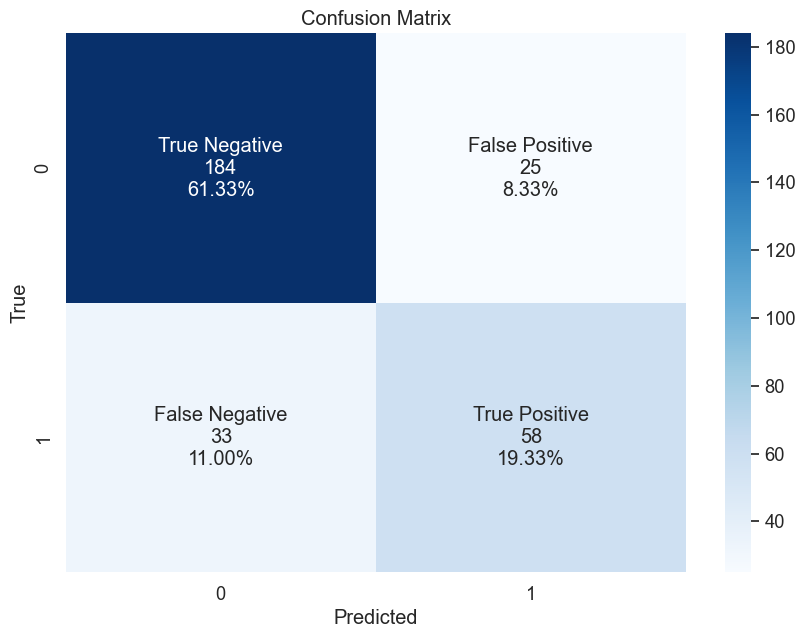

In [350]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined
cm = confusion_matrix(y_test, y_pred_xgb_clf)

# Define the labels of the matrix for clarity
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.2)  # Adjust to fit
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()



### Sklearn Classification report

In [351]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_xgb_clf)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       209
         1.0       0.70      0.64      0.67        91

    accuracy                           0.81       300
   macro avg       0.77      0.76      0.77       300
weighted avg       0.80      0.81      0.80       300



### Logloss calculation: 

In [352]:
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_probabilities_xgb)
print(loss)

0.4547683182008812


# Task 10
10. Explain which model performs better and why.


Your analysis and explanation are well-structured and clear. Let me help you refine the content for clarity and emphasis:

---

# Model Selection and Performance Explanation

## 🏆 The Winning Model: XGBoost! 

When evaluating the performance of my machine learning models, I took a systematic approach that combined multiple metrics to ensure a comprehensive analysis.

1. **Accuracy Score:** My primary metric was the accuracy score, which measures the proportion of correctly predicted observations to the total observations. In this metric, the XGBoost model achieved an impressive 80.6%. This gave me a high-level understanding of the model's effectiveness, but it's vital to consider other metrics as well, especially when dealing with imbalanced data.

2. **F1 Score & Class Distribution:** Upon further inspection, I noted that only 30% of the observations indicated attendance at a class, pointing to an unbalanced class distribution. In such scenarios, the accuracy score alone can be misleading since it might lean heavily towards the majority class. Therefore, we turned to the F1 score, which balances precision and recall, to gauge the model's effectiveness in this unbalanced context. My analysis revealed that the XGBoost model had a superior F1 score for both classes (0 and 1) compared to the Logistic Regression model.

3. **Log Loss:** Beyond accuracy and the F1 score, I also evaluated the models using log loss, a measure of model uncertainty. A lower log loss value indicates a model that's more confident in its predictions. My analysis showed that the XGBoost model exhibited a lower log loss(0.45) compared to the Logistic Regression(0.49), further solidifying its position as the superior model for this particular problem.

---

In conclusion, the combination of high accuracy, a balanced F1 score, and a lower log loss made XGBoost the clear winner in this modeling competition. It's best equipped to handle this specific dataset and prediction challenge.
